Práctica 5



In [0]:
import numpy as np
import scipy.io as sio
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
def load_data():
    d = sio.loadmat('ex5data1.mat')
    return map(np.ravel, [d['X'], d['y'], d['Xval'], d['yval'], d['Xtest'], d['ytest']])

In [0]:
X, y, Xval, yval, Xtest, ytest = load_data()

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


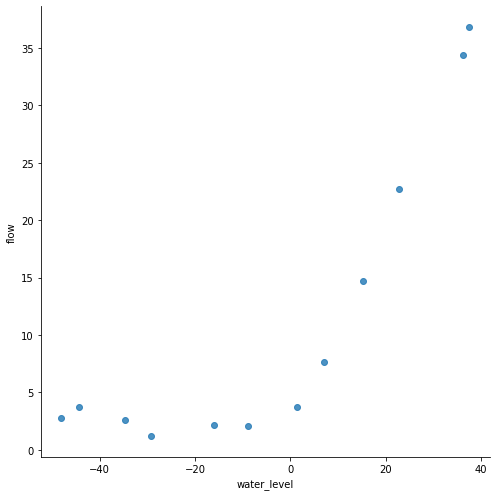

In [5]:
df = pd.DataFrame({'water_level':X, 'flow':y})

sns.lmplot('water_level', 'flow', data=df, fit_reg=False, size=7)
plt.show()

In [0]:
X, Xval, Xtest = [np.insert(x.reshape(x.shape[0], 1), 0, np.ones(x.shape[0]), axis=1) for x in (X, Xval, Xtest)]

Función de costo

In [0]:
def cost(theta, X, y):

    m = np.shape(X)[0]

    inner = X @ theta - y  
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)

    return cost

In [8]:
theta = np.ones(X.shape[1])
cost(theta, X, y)

303.9515255535976

In [0]:
def regularized_cost(theta, X, y, l=1):
    m = np.shape(X)[0]

    regularized_term = (l / (2 * m)) * np.power(theta[1:], 2).sum()

    return cost(theta, X, y) + regularized_term

Gradiente

In [0]:
def gradient(theta, X, y):
    #m = np.shape(X)[0]
    m = np.shape(X)[0]

    inner = X.T @ (X @ theta - y)  

    return inner / m

In [11]:
gradient(theta, X, y)

array([-15.30301567, 598.16741084])

Gradiente regularizado

In [0]:
def regularized_gradient(theta, X, y, l=1):
    #m = X.shape[0]
    m = np.shape(X)[0]

    regularized_term = theta.copy()  
    regularized_term[0] = 0  

    regularized_term = (l / m) * regularized_term

    return gradient(theta, X, y) + regularized_term

In [13]:
regularized_gradient(theta, X, y)

array([-15.30301567, 598.25074417])

In [0]:
def linear_regression_np(X, y, l=1):
    theta = np.ones(np.shape(X)[1])

    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=regularized_gradient,
                       options={'disp': True})
    return res

In [0]:
theta = np.ones(np.shape(X)[0])

final_theta = linear_regression_np(X, y, l=0).get('x')

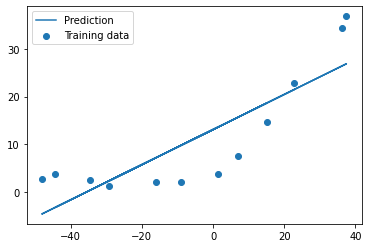

In [16]:
b = final_theta[0] # intercept
m = final_theta[1] # slope

plt.scatter(X[:,1], y, label="Training data")
plt.plot(X[:, 1], X[:, 1]*m + b, label="Prediction")
plt.legend(loc=2)
plt.show()

In [0]:
training_cost, cv_cost = [], []

In [0]:
m = np.shape(X)[0]
for i in range(1, m+1):
    res = linear_regression_np(X[:i, :], y[:i], l=0)
    
    tc = regularized_cost(res.x, X[:i, :], y[:i], l=0)
    cv = regularized_cost(res.x, Xval, yval, l=0)
    
    training_cost.append(tc)
    cv_cost.append(cv)

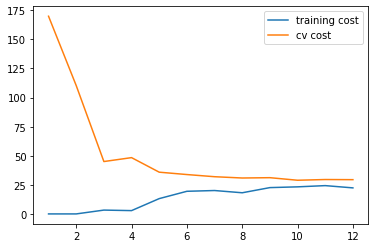

In [19]:
plt.plot(np.arange(1, m+1), training_cost, label='training cost')
plt.plot(np.arange(1, m+1), cv_cost, label='cv cost')
plt.legend(loc=1)
plt.show()

Función para polinomios

In [0]:
def poly_features(x, power, as_ndarray=False):
    data = {'f{}'.format(i): np.power(x, i) for i in range(1, power + 1)}
    df = pd.DataFrame(data)

    return df.as_matrix() if as_ndarray else df

In [0]:
X, y, Xval, yval, Xtest, ytest = load_data()

In [0]:
a = poly_features(X, power=8)

In [0]:
def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std()), df.apply(lambda column:column.mean()), df.apply(lambda column:column.std())

In [24]:
x1, x1mean, x1std=normalize_feature(a)
print(x1)

          f1        f2        f3  ...        f6        f7        f8
0  -0.362141 -0.755087  0.182226  ... -0.590878  0.344516 -0.508481
1  -0.803205  0.001258 -0.247937  ... -0.435818  0.255416 -0.448912
2   1.377467  0.584827  1.249769  ... -0.012156  0.756568 -0.170352
3   1.420940  0.706647  1.359846  ...  0.125637  0.871929 -0.059638
4  -1.434149  1.854000 -2.037163  ...  2.602212 -2.645675  2.766085
5  -0.128687 -0.975969  0.251385  ... -0.594997  0.345812 -0.508955
6   0.680582 -0.780029  0.340656  ... -0.591790  0.346830 -0.508613
7  -0.988534  0.451358 -0.601282  ... -0.141608  0.039403 -0.266693
8   0.216076 -1.074993  0.266275  ... -0.595129  0.345835 -0.508960
9  -1.311501  1.422806 -1.548121  ...  1.388655 -1.368307  1.224144
10  0.403777 -1.015010  0.273379  ... -0.595098  0.345839 -0.508959
11  0.929375 -0.419808  0.510968  ... -0.559030  0.361832 -0.500665

[12 rows x 8 columns]


In [0]:
X_poly = poly_features(X, power=8)
X_poly, X_polymean, X_polystd = normalize_feature(X_poly)
Xval_poly = poly_features(Xval, power=8)
Xval_poly = (Xval_poly - X_polymean) /  X_polystd
Xpoly = np.array(X_poly)
Xvalpoly = np.array(Xval_poly)

In [0]:
m = np.shape(Xpoly)[0]
ones = np.ones((m, 1))
Xpoly = np.hstack((ones, Xpoly))
m = np.shape(Xvalpoly)[0]
ones = np.ones((m, 1))
Xvalpoly = np.hstack((ones, Xvalpoly))

In [62]:
print(np.shape(Xpoly))
print(np.shape(Xvalpoly))

(12, 9)
(21, 9)


In [0]:
def plot_learning_curve(X, y, Xval, yval, l=0):
    training_cost, cv_cost = [], []
    m = np.shape(X)[0]

    for i in range(1, m + 1):
        res = linear_regression_np(X[:i, :], y[:i], l=l)
        tc = cost(res.x, X[:i, :], y[:i])
        cv = cost(res.x, Xval, yval)

        training_cost.append(tc)
        cv_cost.append(cv)

    plt.plot(np.arange(1, m + 1), training_cost, label='training cost')
    plt.plot(np.arange(1, m + 1), cv_cost, label='cv cost')
    plt.legend(loc=1)


In [0]:
theta = np.ones(np.shape(Xpoly)[1])

In [66]:
print(theta)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [0]:
res = linear_regression_np(Xpoly, y, l=0)

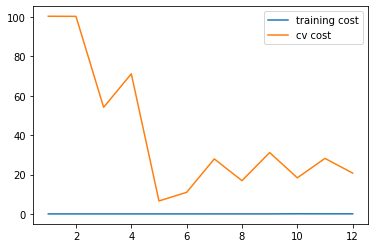

In [68]:
plot_learning_curve(Xpoly, y, Xvalpoly, yval, l=0)
plt.show()

$\lambda=1$

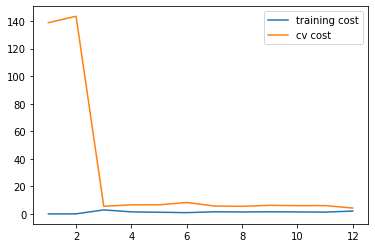

In [69]:
plot_learning_curve(Xpoly, y, Xvalpoly, yval, l=1)
plt.show()

$\lambda=100$

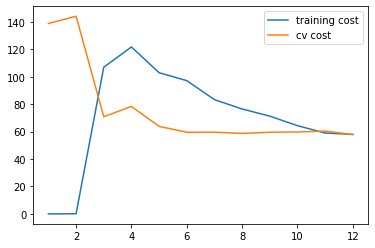

In [70]:
plot_learning_curve(Xpoly, y, Xvalpoly, yval, l=100)
plt.show()

Probando varios $\lambda$

In [0]:
l_candidate = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
training_cost, cv_cost = [], []

In [0]:
for l in l_candidate:
    res = linear_regression_np(Xpoly, y, l)
    
    tc = cost(res.x, Xpoly, y)
    cv = cost(res.x, Xvalpoly, yval)
    
    training_cost.append(tc)
    cv_cost.append(cv)

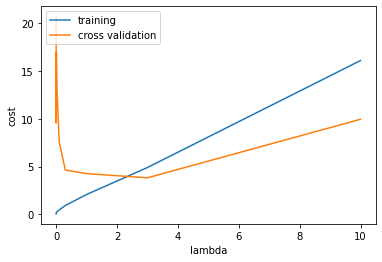

In [73]:
plt.plot(l_candidate, training_cost, label='training')
plt.plot(l_candidate, cv_cost, label='cross validation')
plt.legend(loc=2)

plt.xlabel('lambda')

plt.ylabel('cost')
plt.show()